# Linear regression with PyMC3

<center><img src="images/PyMC3.png"></img></center>

$$
\mathbf{y} \sim X\mathbf{w}  + \mathcal{N}(0, \sigma)
$$

# Bayes' Rule!

$$
\mathbf{y} \sim X\mathbf{w}  + \mathcal{N}(0, \sigma)
$$

$$
p(\mathbf{w} | X, \mathbf{y}) \propto p(\mathbf{y}| X, \mathbf{w}) p(\mathbf{w})
$$

In this case

$$
p(y_j | \mathbf{x}_j, \mathbf{w}) \propto \exp{-\frac{(\mathbf{x}_j \cdot \mathbf{w} - y_j)^2}{2\sigma^2}}
$$

# Bayes' Rule!

$$
\mathbf{y} \sim X\mathbf{w}  + \mathcal{N}(0, \sigma)
$$

$$
p(\mathbf{w} | X, \mathbf{y}) \propto p(\mathbf{y} | X, \mathbf{w}) p(\mathbf{w})
$$

$$
p(\mathbf{w} | X, \mathbf{y}) \propto \prod_j p(y_j | \mathbf{x}_j, \mathbf{w}) p(\mathbf{w})
$$

$$
- \log p(\mathbf{w} | X, \mathbf{y}) \propto - \sum_j \log p(y_j | \mathbf{x}_j, \mathbf{w})  - \log p(\mathbf{w})
$$

# Bayes' Rule!


$$
- \log p(\mathbf{w} | X, \mathbf{y}) \propto - \sum_j \log p(y_j | \mathbf{x}_j, \mathbf{w})  - \log p(\mathbf{w} | X, \mathbf{y})
$$


$$
- \log p(\mathbf{w} | X, \mathbf{y}) \propto \frac{1}{2\sigma^2} \sum_j (\mathbf{x}_j \cdot \mathbf{w} - y_j)^2 + 0
$$

<center><img src="images/pete-1.jpg" style="height: 500px;"></img></center>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib

import utils

matplotlib.rcParams['figure.figsize'] = (0.89 * 16, 8)
matplotlib.rcParams['lines.linewidth'] = 10
matplotlib.rcParams['lines.markersize'] = 20

# The Data

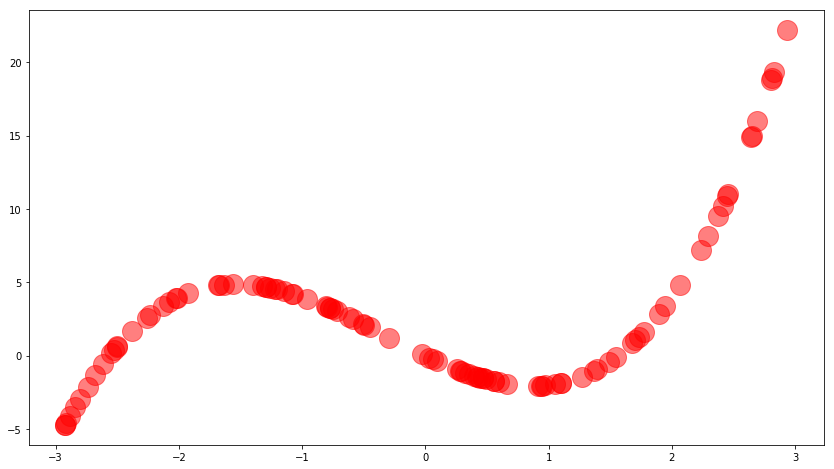

In [2]:
x, y, X, transform, scale = utils.get_base_data()
utils.plotter(x, y)


# Linear Regression with PyMC3

In [3]:
import pymc3 as pm
import theano.tensor as tt

def linear_regression(X, y):
    with pm.Model() as model:
        w = pm.Flat('w', shape=X.shape[1])
        σ = pm.HalfCauchy('σ', beta=10.)
        y_obs = pm.Normal('y', mu=tt.dot(X, w), sd=σ, observed=y.squeeze())
    return model


# Linear Regression with PyMC3

In [4]:
with linear_regression(X, y):
    linear_trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 99%|█████████▉| 2478/2500 [00:08<00:00, 303.12it/s]/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.0816302876457, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 1090 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:08<00:00, 304.88it/s]
/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.0760578829187, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
/Users/colin


# Linear Regression with PyMC3

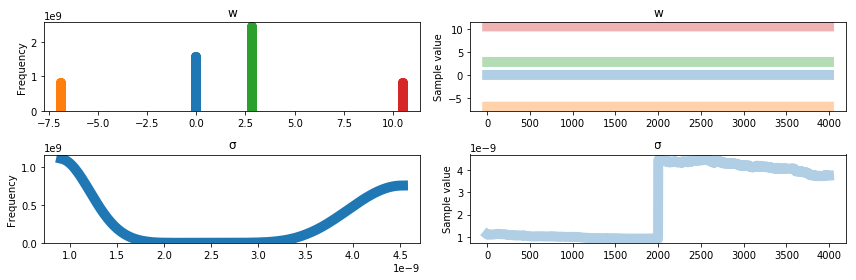

In [5]:
pm.traceplot(linear_trace, combined=True);


# Linear Regression with PyMC3

In [6]:
linear_trace['w'] / scale

array([[ -9.63140586e-11,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [ -2.18012906e-10,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [ -2.18012906e-10,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       ..., 
       [ -8.22467481e-10,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [ -8.22467481e-10,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [ -1.70956903e-10,  -4.00000000e+00,   1.00000000e+00,
          1.00000000e+00]])

In [7]:
class PyMCModel(object):
    def __init__(self, model):
        self.model = model
    
    def fit(self, X, y):
        with self.model(X, y):
            self.trace_ = pm.sample(2000)
        return self
    
    def predict(self, X):
        return X.dot(self.trace_['w'].T)

# What about noise?

In [8]:
noise = utils.get_noise()

linear = PyMCModel(linear_regression).fit(X, y + noise)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:07<00:00, 324.34it/s]
/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:452: UserWarning: The acceptance probability in chain 1 does not match the target. It is 0.892020900806, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))


# What about noise?

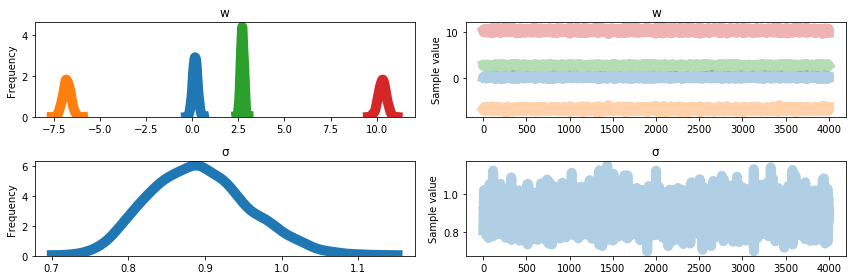

In [9]:
pm.traceplot(linear.trace_, combined=True);

# What about noise?

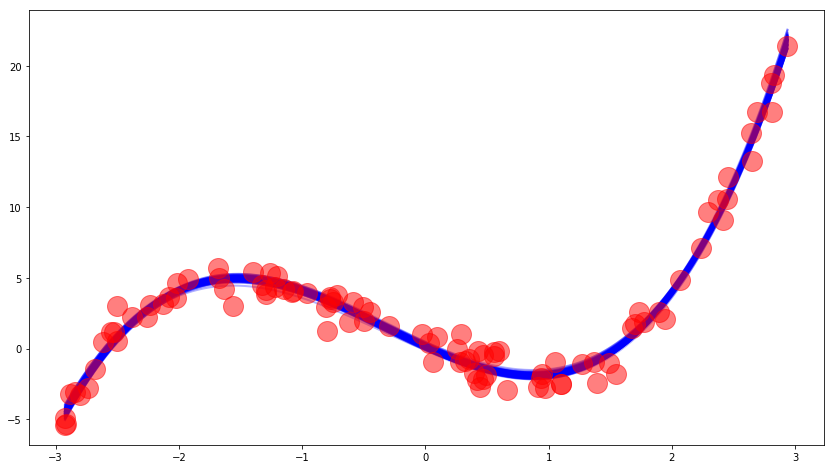

In [11]:
utils.plotter(x, y + noise, fit_fn=linear.predict, transform=transform)

# What about noise?

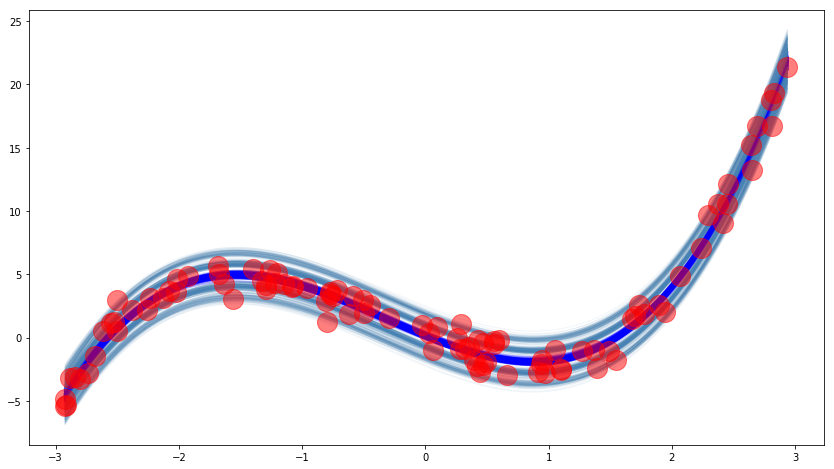

In [12]:
utils.plotter(x, y + noise, fit_fn=linear.predict, noise = linear.trace_['σ'], transform=transform)

# Exercise 6

# Bayesian Ridge Regression

Regularization means putting a prior on $\mathbf{w}$.

# Bayesian Ridge Regression

Suppose $$\mathbf{w} \sim \mathcal{N}(0, \sigma_w)$$

$$ p(\mathbf{w}) \propto \exp{\left(-\frac{\sum w_j^2}{2\sigma_w^2}\right)}$$

<center><img src="images/pete-2.jpg" style="height: 400px;"></img></center>

# Bayes' Rule!


$$
- \log p(\mathbf{w} | X, \mathbf{y}) \propto - \sum_j \log p(y_j | \mathbf{x}_j, \mathbf{w})  - \log p(\mathbf{w} | X)
$$



$$
- \log p(\mathbf{w} | X, \mathbf{y}) \propto \frac{1}{\sigma^2} \sum_j (\mathbf{x}_j \cdot \mathbf{w} - y_j)^2 + \frac{1}{2\sigma^2_w} \sum_j w_j^2
$$

<center><img src="images/pete-3.jpg" style="height: 400px;"></img></center>

# Bayesian Ridge Regression


In [13]:
def ridge_regression(X, y):
    with pm.Model() as model:
        α = pm.HalfCauchy('α', beta=10.)
        w = pm.Normal('w', mu=0., sd=α, shape=X.shape[1])
        σ = pm.HalfCauchy('σ', beta=10.)
        y_obs = pm.Normal('y', mu=tt.dot(X, w), sd=σ, observed=y.squeeze())
    return model

# Bayesian Ridge Regression

In [14]:
x_train, x_test, y_train, y_test, X_train, X_test, transform, scale = utils.get_overfitting_data()

ridge = PyMCModel(ridge_regression)
ridge.fit(X_train, y_train);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
 94%|█████████▍| 2362/2500 [00:47<00:02, 49.65it/s]/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 1 contains 2 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|█████████▉| 2499/2500 [00:49<00:00, 50.48it/s]/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 1 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [00:49<00:00, 50.48it/s]


# Bayesian Ridge Regression


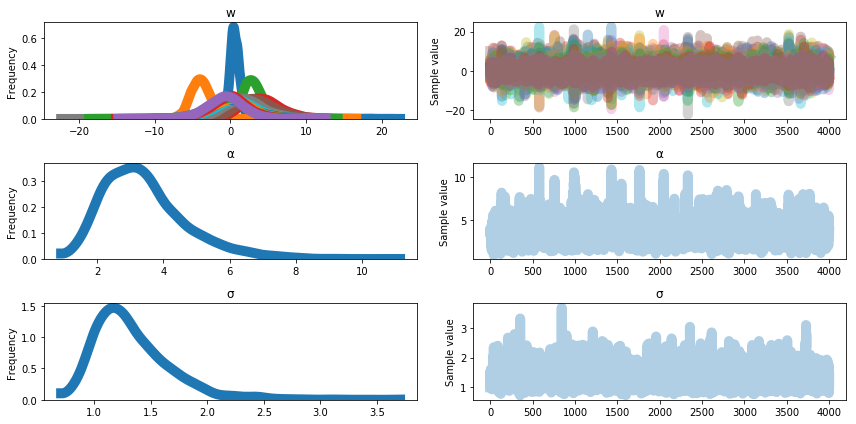

In [15]:
pm.traceplot(ridge.trace_, combined=True);

# Bayesian Ridge Regression


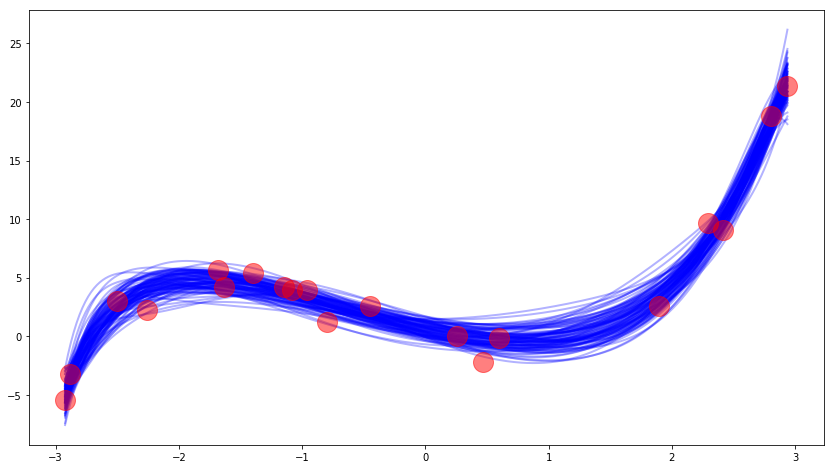

In [16]:
utils.plotter(x_train, y_train, fit_fn=ridge.predict, transform=transform)# Bayesian Ridge Regression


# Bayesian Ridge Regression


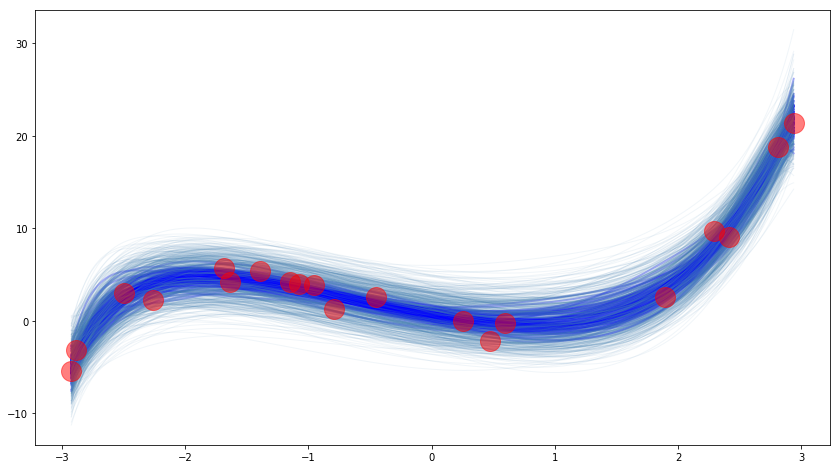

In [17]:
utils.plotter(x_train, y_train, fit_fn=ridge.predict, transform=transform, noise=ridge.trace_['σ'])

# Bayesian Ridge Regression


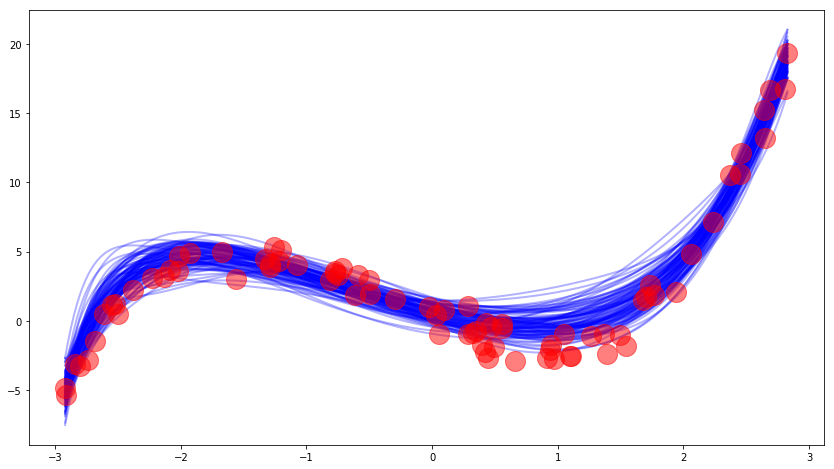

In [18]:
utils.plotter(x_test, y_test, fit_fn=ridge.predict, transform=transform)

# Bayesian Ridge Regression


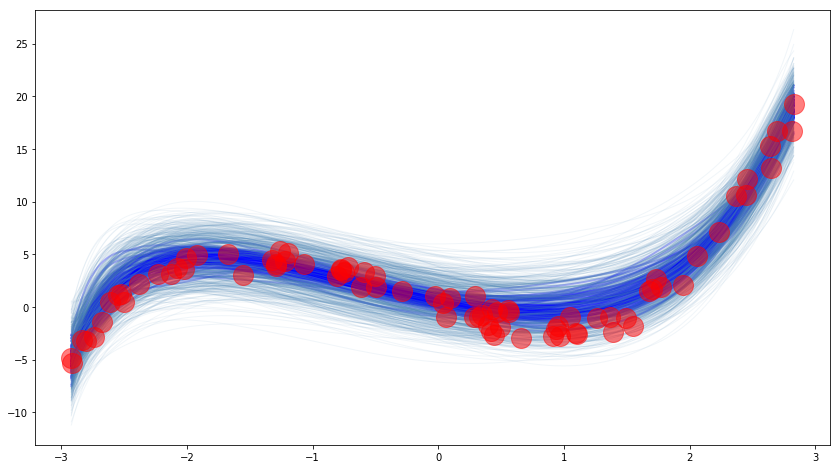

In [19]:
utils.plotter(x_test, y_test, fit_fn=ridge.predict, transform=transform, noise=ridge.trace_['σ'])

# Exercise 7

# Bayesian Lasso


In [20]:
def lasso_regression(X, y):
    with pm.Model() as model:
        β = pm.HalfCauchy('β', beta=10.)
        w = pm.Laplace('w', mu=0., b=β, shape=X.shape[1])
        σ = pm.HalfCauchy('σ', beta=10.)
        y_obs = pm.Normal('y', mu=tt.dot(X, w), sd=σ, observed=y.squeeze())
    return model

# Bayesian Lasso


In [21]:
lasso = PyMCModel(lasso_regression)
lasso.fit(X_train, y_train);

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2495/2500 [07:27<00:00,  5.58it/s]/Users/colin/projects/pymc3/pymc3/step_methods/hmc/nuts.py:468: UserWarning: Chain 0 contains 18 diverging samples after tuning. If increasing `target_accept` does not help try to reparameterize.
  % (self._chain_id, n_diverging))
100%|██████████| 2500/2500 [07:27<00:00,  5.59it/s]


# Bayesian Lasso


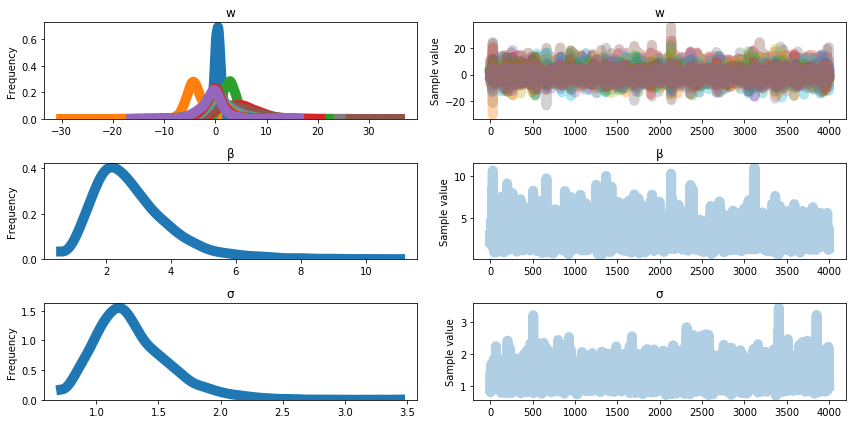

In [22]:
pm.traceplot(lasso.trace_, combined=True);

# Bayesian Lasso


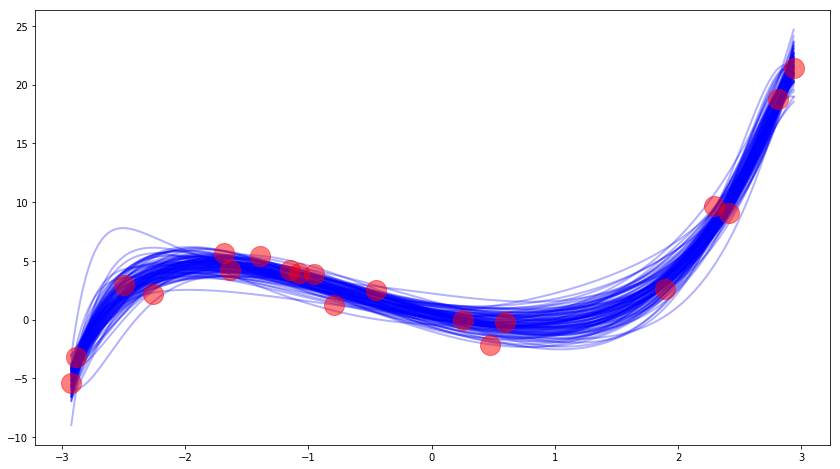

In [23]:
utils.plotter(x_train, y_train, fit_fn=lasso.predict, transform=transform)

# Bayesian Lasso

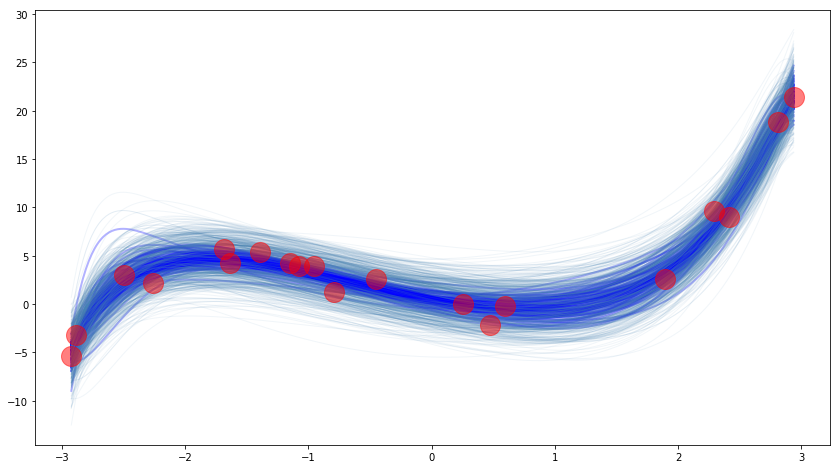

In [24]:
utils.plotter(x_train, y_train, fit_fn=lasso.predict, transform=transform, noise=lasso.trace_['σ'])

# Bayesian Lasso


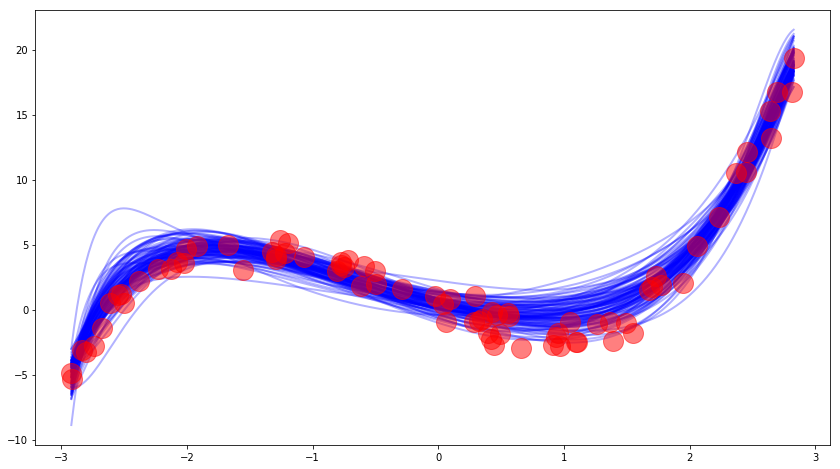

In [25]:
utils.plotter(x_test, y_test, fit_fn=lasso.predict, transform=transform)

# Bayesian Lasso


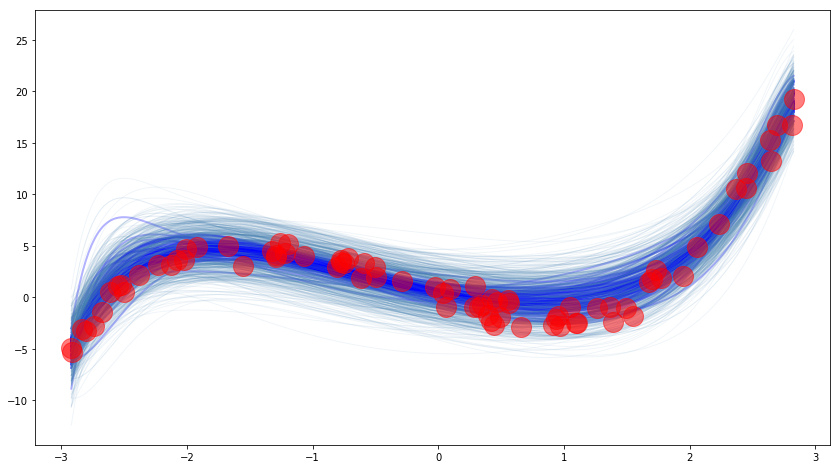

In [26]:
utils.plotter(x_test, y_test, fit_fn=lasso.predict, transform=transform, noise=lasso.trace_['σ'])